# The 2000 U.S. Presidential Election

The 2000 presidential election---between Republican George W. Bush, Democrat Al Gore, and other third-party candidates---was one of the closest in American history. The election came down to one state, Florida, which Bush won by just 537 votes (out of nearly 6,000,000 votes cast in the state).

After Election Day, Democrats claimed that the "butterfly ballot" that was used in Palm Beach County confused Gore voters into voting for Reform Party candidate Pat Buchanan. The ballot in question is shown below. To vote for Gore, who is listed second on the left, a voter actually had to punch the third hole (because the second hole is actually a vote for Buchanan, who is listed first on the right).

![](butterfly.jpg)

In this lab, you will evaluate this. The data file `florida.csv` contains county-level information about:

- the number of votes for Gore, Bush, Buchanan (and a few other candidates) in the 2000 presidential election
- the number of votes for Clinton (Democrat), Dole (Republican), and Perot (Reform) in the 1996 presidential election
- the number of votes for Buchanan in the 1996 primary
- the number of registered Reform voters and the total number of registered voters

Using this data, evaluate the claim that many voters in Palm Beach County voted for Buchanan when they intended to vote for Gore. (_Hint:_ You should check whether Palm Beach County fits the general pattern of the other counties in Florida. Visualizations will likely be more helpful than summary statistics.) Then, craft a story that guides the reader through your discoveries. Your story should contain both figures and explanations.

In [1]:
# YOUR CODE HERE -- Done
import pandas as pd
df = pd.read_csv("florida.csv")
df.head()

,county,buchanan2000,gore2000,bush2000,nader2000,browne2000,total2000,clinton96,dole96,perot96,buchanan96p,reform.reg,total.reg
0,ALACHUA,262,"47,300","34,062","3,215",658,"85,235","40,144","25,303","8,072","2,151",91,"120,867"
1,BAKER,73,"2,392","5,610",53,17,"8,072","2,273","3,684",667,73,4,"12,352"
2,BAY,248,"18,850","38,637",828,171,"58,486","17,020","28,290","5,922","1,816",55,"92,749"
3,BRADFORD,65,"3,072","5,413",84,28,"8,597","3,356","4,038",819,155,3,"13,547"
4,BREVARD,570,"97,318","115,185","4,470",643,"217,616","80,416","87,980","25,249","7,927",148,"283,680"


In [2]:
%matplotlib inline
df.buchanan2000 = df.buchanan2000.str.replace(',', '')
df.gore2000 = df.gore2000.str.replace(',', '')
df.bush2000 = df.bush2000.str.replace(',', '')
df.nader2000 = df.nader2000.str.replace(',', '')
df.browne2000 = df.browne2000.str.replace(',', '')
df.total2000 = df.total2000.str.replace(',', '')
df.clinton96 = df.clinton96.str.replace(',', '')
df.dole96 = df.dole96.str.replace(',', '')
df.perot96 = df.perot96.str.replace(',', '')
df.buchanan96p = df.buchanan96p.str.replace(',', '')
#df['reform.reg'] = df['reform.reg'].str.replace(',', '')
df['total.reg'] = df['total.reg'].str.replace(',', '')

totalMean = df.buchanan2000.mean()
PBMean = df.loc[df['county'] == 'PALM BEACH'].buchanan2000.sum()

df.loc[df['county'] == 'PALM BEACH']

,county,buchanan2000,gore2000,bush2000,nader2000,browne2000,total2000,clinton96,dole96,perot96,buchanan96p,reform.reg,total.reg
66,PALM BEACH,3407,268945,152846,5564,743,428098,230621,133762,30739,8788,9,14358


In [3]:
df_percent = df
df_percent.loc[:,'buchanan2000':'total.reg'] = df_percent.loc[:,'buchanan2000':'total.reg'].astype(int)
df_percent.loc[:,'buchanan2000':'browne2000'] = df_percent.loc[:,'buchanan2000':'browne2000'].divide(df_percent['total2000'], axis=0)
df_percent.loc[:,'buchanan2000':'browne2000'] = df_percent.loc[:,'buchanan2000':'browne2000'] * 100
df_percent.loc[:,'clinton96':'buchanan96p'] = df_percent.loc[:,'clinton96':'buchanan96p'].divide(df_percent['total.reg'], axis=0)
df_percent.loc[:,'clinton96':'buchanan96p'] = df_percent.loc[:,'clinton96':'buchanan96p'] * 100
df_percent.head()

,county,buchanan2000,gore2000,bush2000,nader2000,browne2000,total2000,clinton96,dole96,perot96,buchanan96p,reform.reg,total.reg
0,ALACHUA,0.307385,55.493635,39.962457,3.771925,0.771983,85235,33.213367,20.934581,6.678415,1.779642,91,120867
1,BAKER,0.904361,29.633300,69.499504,0.656591,0.210605,8072,18.401878,29.825130,5.399935,0.590997,4,12352
2,BAY,0.424033,32.229935,66.061964,1.415723,0.292378,58486,18.350602,30.501677,6.384975,1.957973,55,92749
3,BRADFORD,0.756078,35.733395,62.963825,0.977085,0.325695,8597,24.773012,29.807337,6.045619,1.144165,3,13547
4,BREVARD,0.261929,44.720057,52.930391,2.054077,0.295475,217616,28.347434,31.013818,8.900522,2.794346,148,283680


This table shows the percentage of each candidate. It is clear that the majority of the votes in 2000 belonged to Gore and Bush in Florida. I also want to note that Buchanan received low votes in majority of the counties.

In [4]:
df_percent = df_percent.drop(["total2000", "reform.reg", "total.reg"], axis=1)
df_percent.mean(axis=0)

buchanan2000     0.469747
gore2000        42.842173
bush2000        55.253577
nader2000        1.559755
browne2000       0.344495
clinton96       65.738526
dole96          53.573630
perot96         13.681530
buchanan96p      3.687157
dtype: float64

This is the median percentage of each candidate throughout the entire state of Florida

In [5]:
PB = df_percent.loc[df_percent['county'] == 'PALM BEACH']
PB

,county,buchanan2000,gore2000,bush2000,nader2000,browne2000,clinton96,dole96,perot96,buchanan96p
66,PALM BEACH,0.795846,62.823232,35.703507,1.299702,0.173558,1606.219529,931.620003,214.089706,61.206296


According to this table entry, the county of Palm Beach does follow the general pattern of the state of Florida. The only difference to note is that there was an increase in voter turnout for this county due to population growth.

In [6]:
print("Florida Median", df.buchanan2000.mean())
print("Palm Beach Median",PB.buchanan2000.mean())

('Florida Median', 0.46974696644930847)
('Palm Beach Median', 0.7958458110058911)


Palm Beach's median vote for Buchanan is doubled of the median of the entire Florida. But maybe Palm Beach really likes Buchanan more than other 

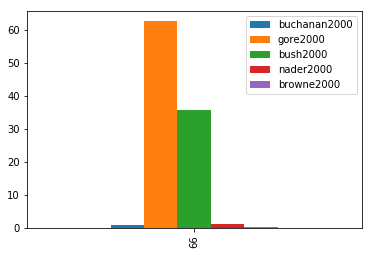

In [7]:
PB2000 = PB.loc[:,'buchanan2000':'browne2000']
PB2000.plot.bar()

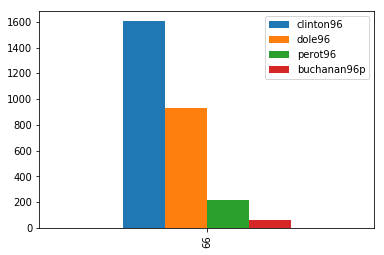

In [8]:
PB96 = PB.loc[:,'clinton96':'buchanan96p']
PB96.plot.bar()

In [9]:
print("Average vote for Buchanan in Florida", totalMean)
print("Average vote for Buchanan in Palm Beach", PBMean)

('Average vote for Buchanan in Florida', 3.921380396374313e+170)
('Average vote for Buchanan in Palm Beach', '3407')


Both the average total votes for Buchanan in Palm Beach and the percentage of votes for Buchanan in Palm Beach has significantly increased. Unless the county of Palm Beach decided to vote for Buchanan rather than the majority, then there must be some interference with the votes. In this case, although correlation does not imply causation, we can firmly say that the data does suggests that there was a butterly ballot in effect in Palm Beach due to the random rise of votes for Buchanan in 2000.

# Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.
2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.
2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)
3. Upload the PDF and Notebook to iLearn.